In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../MachineLearningCVE/DDos.pcap_ISCX.csv")

# print number of rows
print("Number of rows:", df.shape[0])

Number of rows: 225745


In [4]:
#trim all and lower all columns
df.columns = df.columns.str.strip()
#trim all and lower all columns
df.columns = df.columns.str.lower()

In [5]:
# Check for missing or null values and handle them
print(df.isnull().sum()) # check for null values
df.dropna() # drop rows with null values

# Check for duplicate records and remove them if necessary
print(df.duplicated().sum()) # check for duplicates
df.drop_duplicates() # drop duplicate rows

destination port               0
flow duration                  0
total fwd packets              0
total backward packets         0
total length of fwd packets    0
                              ..
idle mean                      0
idle std                       0
idle max                       0
idle min                       0
label                          0
Length: 79, dtype: int64
2633


,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,fwd packet length std,...,min_seg_size_forward,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
# Convert label column to binary values
df["label"] = df["label"].apply(lambda x: 0 if "BENIGN" in x else 1)
df = df.rename(columns={'label': 'is attack'})

In [7]:
# Create new features that may be useful in detecting attacks
df["total packet length"] = df["total length of fwd packets"] + df["total length of bwd packets"]
df["packet length ratio"] = df["total length of fwd packets"] / (df["total length of bwd packets"] + 0.1)
df["packet rate"] = df["total fwd packets"] + df["total backward packets"]
df["flow duration (ms)"] = df["flow duration"] / 1000

In [8]:
# Compute the correlation matrix between all features and the target variable
corr_matrix = df.corr()['is attack'].sort_values()

In [9]:
# Set threshold for correlation with target variable
corr_threshold = 0.2
# get columns with NaN correlation
nan_columns = list(corr_matrix[corr_matrix.isna()].index) 

In [10]:
# Get a list of column names with correlation below a certain threshold (e.g. 0.1)
low_corr_cols = list(corr_matrix[corr_matrix.abs() < corr_threshold].index) 
#append nan columns to low_corr_cols
low_corr_cols.extend(nan_columns)
# Drop columns with low correlation to target variable
df = df.drop(low_corr_cols, axis=1)

In [13]:
# Export the new data set
df.to_csv("../processed/preprocessed_dataset.csv", index=False)

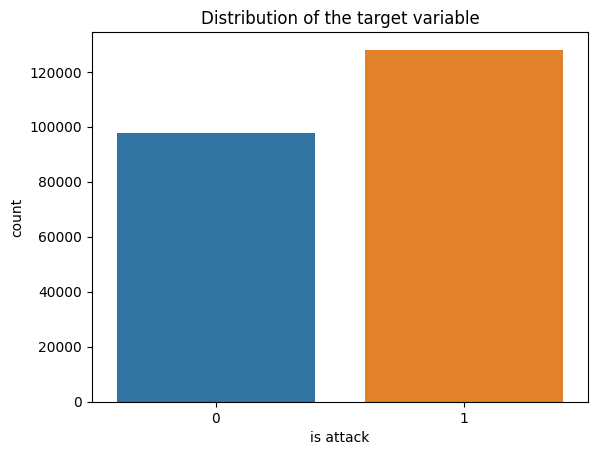

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of the target variable
sns.countplot(x="is attack", data=df)
plt.title("Distribution of the target variable")
plt.show()

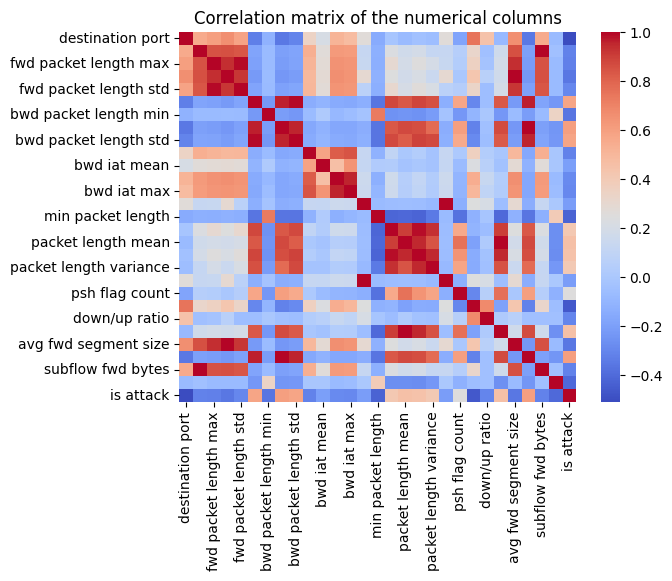

In [15]:
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation matrix of the numerical columns")
plt.show()

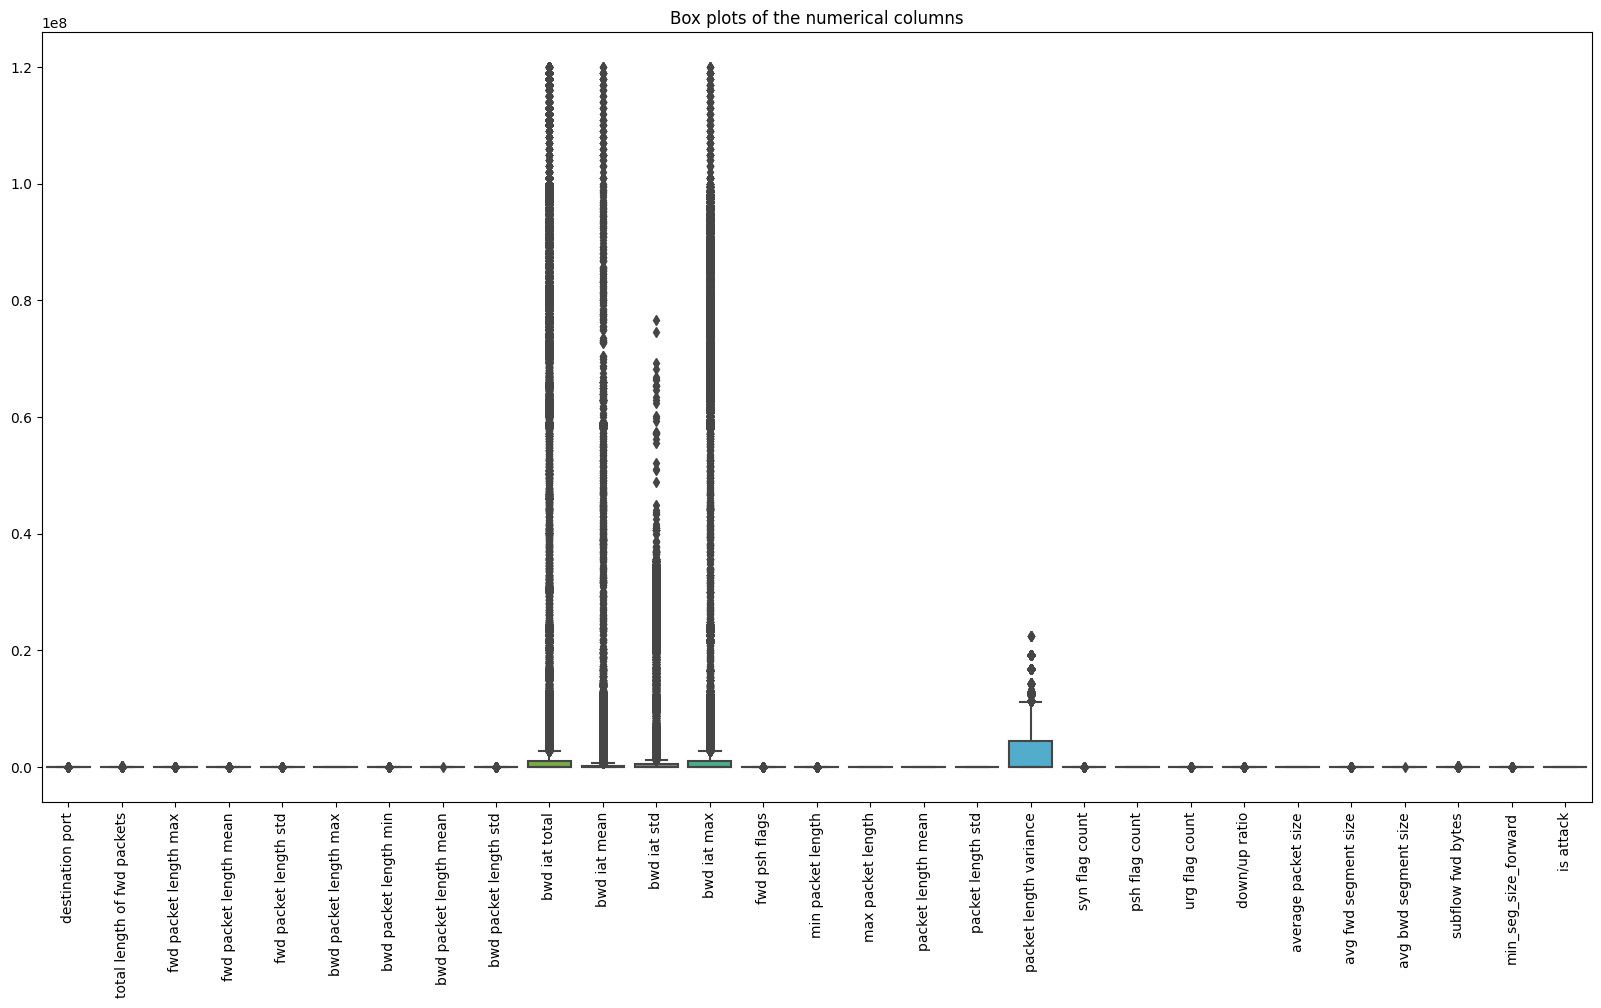

In [16]:
# Visualize the box plots of the numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.title("Box plots of the numerical columns")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('../processed/preprocessed_dataset.csv')

# Split the dataset into training and test datasets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Export the datasets as CSV files
train_df.to_csv('../processed/training.csv', index=False)
test_df.to_csv('../processed/test.csv', index=False)